## Compensation Data Analysis - Log Transformed Predictions

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.cross_decomposition import PLSRegression

import statsmodels.api as sm

import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.weight"] = "bold"
plt.style.use('ggplot')

In [3]:
comp = pd.read_csv('data/prepped_comp_data_interactions.csv', index_col='entry_id')
comp

,log_total_comp,log_salary,log_stock,log_bonus,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
4,6.359576,5.192962,5.959718,2.197336,0.712125,-0.123292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.153297,4.787500,-6.907755,3.970311,0.896446,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.247029,4.700489,4.382039,-6.907755,-0.578121,0.221278,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,5.049862,4.905282,2.079567,2.565026,-0.393800,0.565848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,5.303310,5.056252,3.258135,3.332240,1.080767,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,4.744941,4.744941,-6.907755,-6.907755,-0.025158,-0.467863,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30139,5.913506,5.231114,5.010642,3.496538,0.712125,1.254988,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30140,5.356591,5.176155,-6.907755,3.555377,-0.762442,-0.812433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
RANDOM_STATE = 721
X_train, X_test, _, _ = train_test_split(comp, comp, test_size=0.1, random_state=RANDOM_STATE)

y_log_total_comp = X_train.log_total_comp
y_log_salary = X_train.log_salary
y_log_stock = X_train.log_stock
y_log_bonus = X_train.log_bonus
X = X_train.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

y_test_log_total_comp = X_test.log_total_comp
y_test_log_salary = X_test.log_salary
y_test_log_stock = X_test.log_stock
y_test_log_bonus = X_test.log_bonus
X_test = X_test.drop(columns=['log_total_comp', 'log_salary', 'log_stock', 'log_bonus'])

X
X_test

,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
1042,0.343483,0.221278,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,-0.393800,0.565848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21860,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7900,-0.209479,0.910418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,-0.393800,0.565848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,-0.762442,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13550,-0.025158,-0.467863,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8130,0.527804,-0.123292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,scaled_years_experience,scaled_years_company,company[AT&T],company[Accenture],company[Adobe],company[Airbnb],company[Amazon],company[American Express],company[Andela],company[Apple],...,company_location[WeWork_NYC Area],company_location[WeWork_SF Bay Area],company_location[Workday_SF Bay Area],company_location[Yahoo_SF Bay Area],"company_location[Yandex_Moscow, MC, Russia]",company_location[Yelp_SF Bay Area],company_location[Zillow_SF Bay Area],company_location[Zillow_Seattle Area],company_location[eBay_SF Bay Area],company_location[eBay_Seattle Area]
entry_id,,,,,,,,,,,,,,,,,,,,,
23789,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11706,0.712125,1.254988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,-0.578121,-0.467863,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,-1.131083,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5982,0.343483,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,-0.578121,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25710,-0.578121,-0.467863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13958,0.896446,-0.812433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection

In [5]:
num_features = X.columns.size

alphas = 10**np.linspace(10,-2,100)
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def ridge(X, y):
    ridgecv = skl_lm.RidgeCV(alphas=alphas, cv=kf, scoring='neg_mean_squared_error')
    ridgecv.fit(X, y)

    optimal_ridge = skl_lm.Ridge()
    optimal_ridge.set_params(alpha=ridgecv.alpha_)
    optimal_ridge.fit(X, y)

    coefs = pd.Series(optimal_ridge.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_ridge.predict(X)))
    
    return {
        'model_type': 'ridge',
        'model': optimal_ridge,
        'intercept': optimal_ridge.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def lasso(X, y):
    lassocv = skl_lm.LassoCV(alphas = alphas, cv=kf, max_iter=10000)
    lassocv.fit(X, y)

    optimal_lasso = skl_lm.Lasso()
    optimal_lasso.set_params(alpha = lassocv.alpha_)
    optimal_lasso.fit(X, y)

    coefs = pd.Series(optimal_lasso.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, optimal_lasso.predict(X)))
    
    return {
        'model_type': 'lasso',
        'model': optimal_lasso,
        'intercept': optimal_lasso.intercept_,
        'coefs': coefs,
        'rmse': rmse }

def pls(X, y):
    regr = skl_lm.LinearRegression()
    num_components = 7 # num_features
    mse = []
    for i in np.arange(1, num_components):
        pls=PLSRegression(n_components=i)
        score = -1*cross_val_score(pls, X.iloc[:,:i], y, cv=kf, scoring='neg_mean_squared_error').mean()
        mse.append(score)
    mse_per_component = pd.Series(np.array(mse).flatten(), index = np.arange(1, num_components))
    min_component = np.argmin(mse_per_component) + 1

    pls = PLSRegression(n_components=min_component, scale=False)
    pls.fit(X, y)

    coefs = pd.Series(pls.coef_.flatten(), index=X.columns)
    rmse = np.sqrt(mean_squared_error(y, pls.predict(X)))
    
    return {
        'model_type': 'pls',
        'model': pls,
        'intercept': None,
        'coefs': coefs,
        'rmse': rmse,
        'min_component': min_component }

def get_model_type_min_mse(models):
    min_model_type = None
    for index, (model_type, model) in enumerate(models.items()):            
        if index == 0 or model['rmse'] < models[min_model_type]['rmse']:
            min_model_type = model_type
    return min_model_type

def perform_model_selection(X, y, identifier):
    models = {
        'ridge': ridge(X, y),
        'lasso': lasso(X, y),
        'pls': pls(X, y),
    }
    
    print(f'Performing model selection on {identifier}.')
    for model_type in models:
        print(f'{model_type} RMSE:\t', models[model_type]['rmse'])

    best_model_type = get_model_type_min_mse(models)
    best_model = models[best_model_type]
    print(f'Best model is {best_model_type}.')
    
    print('\nIntercept:\t\t', best_model['intercept'], '\n')
    print(best_model['coefs'])
    
    return best_model, models

## Salary Model Selection

In [6]:
best_model_salary, all_models_salary = perform_model_selection(X, y_log_salary, 'log salary')

Performing model selection on log salary.
ridge RMSE:	 0.18828117720094223
lasso RMSE:	 0.32573896649466955
pls RMSE:	 0.2481697404386227
Best model is ridge.

Intercept:		 4.425828079198047 

scaled_years_experience                  0.099443
scaled_years_company                     0.002682
company[AT&T]                           -0.139985
company[Accenture]                      -0.499426
company[Adobe]                          -0.040140
                                           ...   
company_location[Yelp_SF Bay Area]       0.036376
company_location[Zillow_SF Bay Area]     0.002799
company_location[Zillow_Seattle Area]    0.045926
company_location[eBay_SF Bay Area]      -0.102977
company_location[eBay_Seattle Area]     -0.013751
Length: 615, dtype: float64


## Stock Model Selection

In [7]:
best_model_stock, all_models_stock = perform_model_selection(X, y_log_stock, 'log stock')

Performing model selection on log stock.
ridge RMSE:	 2.261744663100029
lasso RMSE:	 2.8735393723418383
pls RMSE:	 2.7371468316430194
Best model is ridge.

Intercept:		 -3.08852431358582 

scaled_years_experience                  0.304200
scaled_years_company                     0.097606
company[AT&T]                           -4.271083
company[Accenture]                      -2.509328
company[Adobe]                           5.177375
                                           ...   
company_location[Yelp_SF Bay Area]      -1.629344
company_location[Zillow_SF Bay Area]    -1.152824
company_location[Zillow_Seattle Area]   -0.914856
company_location[eBay_SF Bay Area]      -1.735681
company_location[eBay_Seattle Area]     -1.175197
Length: 615, dtype: float64


## Bonus Model Selection

In [8]:
best_model_bonus, all_models_bonus = perform_model_selection(X, y_log_bonus, 'log bonus')

Performing model selection on log bonus.
ridge RMSE:	 2.721960116854886
lasso RMSE:	 3.1082511907859356
pls RMSE:	 3.0084812948643336
Best model is ridge.

Intercept:		 -0.48211323642112225 

scaled_years_experience                  0.255006
scaled_years_company                    -0.222203
company[AT&T]                            2.346691
company[Accenture]                       0.276758
company[Adobe]                           1.965400
                                           ...   
company_location[Yelp_SF Bay Area]       0.130035
company_location[Zillow_SF Bay Area]     0.819488
company_location[Zillow_Seattle Area]    0.467731
company_location[eBay_SF Bay Area]       0.214880
company_location[eBay_Seattle Area]     -0.052077
Length: 615, dtype: float64


## Suggested Negotiation Values

In [9]:
def get_prediction_range(best_model, X_test, y_test):
    y_pred_rmse = best_model['rmse']
    y_pred_log = best_model['model'].predict(X_test).flatten()
    test_error_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
    print(test_error_log)
    
    y_pred = np.exp(y_pred_log)
    y_pred_lower_bound = y_pred * np.exp(y_pred_rmse * -1)
    y_pred_upper_bound = y_pred * np.exp(y_pred_rmse * 1)

    y_test_orig = np.exp(y_test) 
    test_error_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred))
    print(test_error_orig)
    
    y_pred_range = pd.DataFrame(data={
        'pred_lower_bound': y_pred_lower_bound,
        'pred': y_pred,
        'pred_upper_bound': y_pred_upper_bound,
    }, index=X_test.index)
    
    return y_pred_range

In [10]:
y_pred_salary_range = get_prediction_range(best_model_salary, X_test, y_test_log_salary)
y_pred_salary_range

0.18880734420168602
25.048192206487823


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,111.844568,135.015731,162.987332
11706,114.162313,137.813651,166.364904
310,145.049297,175.099580,211.375467
815,112.545326,135.861667,164.008522
5982,139.817714,168.784155,203.751657
...,...,...,...
25211,87.568669,105.710524,127.610879
25710,109.142130,131.753422,159.049160
13958,155.764130,188.034236,226.989834


In [11]:
y_pred_stock_range = get_prediction_range(best_model_stock, X_test, y_test_log_stock)
y_pred_stock_range

2.4790880951204493
77.42111847681554


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,5.229889,50.206010,481.968807
11706,3.177331,30.501817,292.812047
310,8.266644,79.358321,761.825840
815,5.457000,52.386237,502.898602
5982,7.932610,76.151656,731.042421
...,...,...,...
25211,0.000414,0.003970,0.038115
25710,0.010320,0.099073,0.951080
13958,10.966033,105.271973,1010.592307


In [12]:
y_pred_bonus_range = get_prediction_range(best_model_bonus, X_test, y_test_log_bonus)
y_pred_bonus_range

2.766503294602733
24.90698870407993


,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,0.005275,0.080236,1.220404
11706,0.820645,12.482095,189.854000
310,0.951817,14.477240,220.200364
815,1.263187,19.213202,292.234854
5982,1.044293,15.883815,241.594526
...,...,...,...
25211,0.306558,4.662778,70.921355
25710,0.030654,0.466246,7.091652
13958,2.994668,45.549220,692.808500


In [13]:
y_pred_total_comp_sum_range = y_pred_salary_range + y_pred_stock_range + y_pred_bonus_range
y_test_total_comp = np.exp(y_test_log_total_comp)

np.sqrt(mean_squared_error(y_test_total_comp, y_pred_total_comp_sum_range.pred))
y_pred_total_comp_sum_range

100.09426841312361

,pred_lower_bound,pred,pred_upper_bound
entry_id,,,
23789,117.079732,185.301977,646.176543
11706,118.160290,180.797563,649.030950
310,154.267758,268.935141,1193.401671
815,119.265512,207.461106,959.141979
5982,148.794618,260.819626,1176.388604
...,...,...,...
25211,87.875640,110.377273,198.570350
25710,109.183104,132.318740,167.091891
13958,169.724831,338.855429,1930.390641


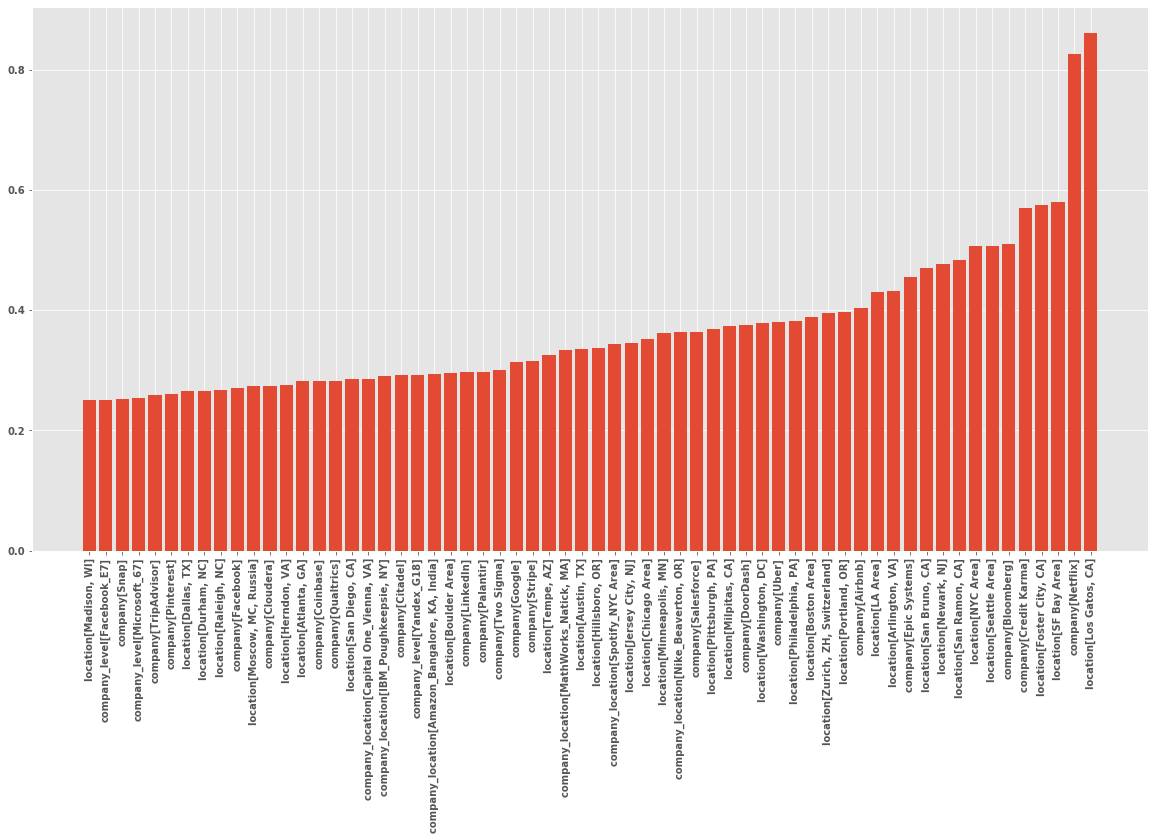

In [14]:
coefs = best_model_salary['coefs']

coefs_increase = best_model_salary['coefs'][best_model_salary['coefs'] > 0.25]
coefs_increase = coefs_increase.sort_values()
x = plt.bar(coefs_increase.index, coefs_increase)
x = plt.xticks(rotation=90)

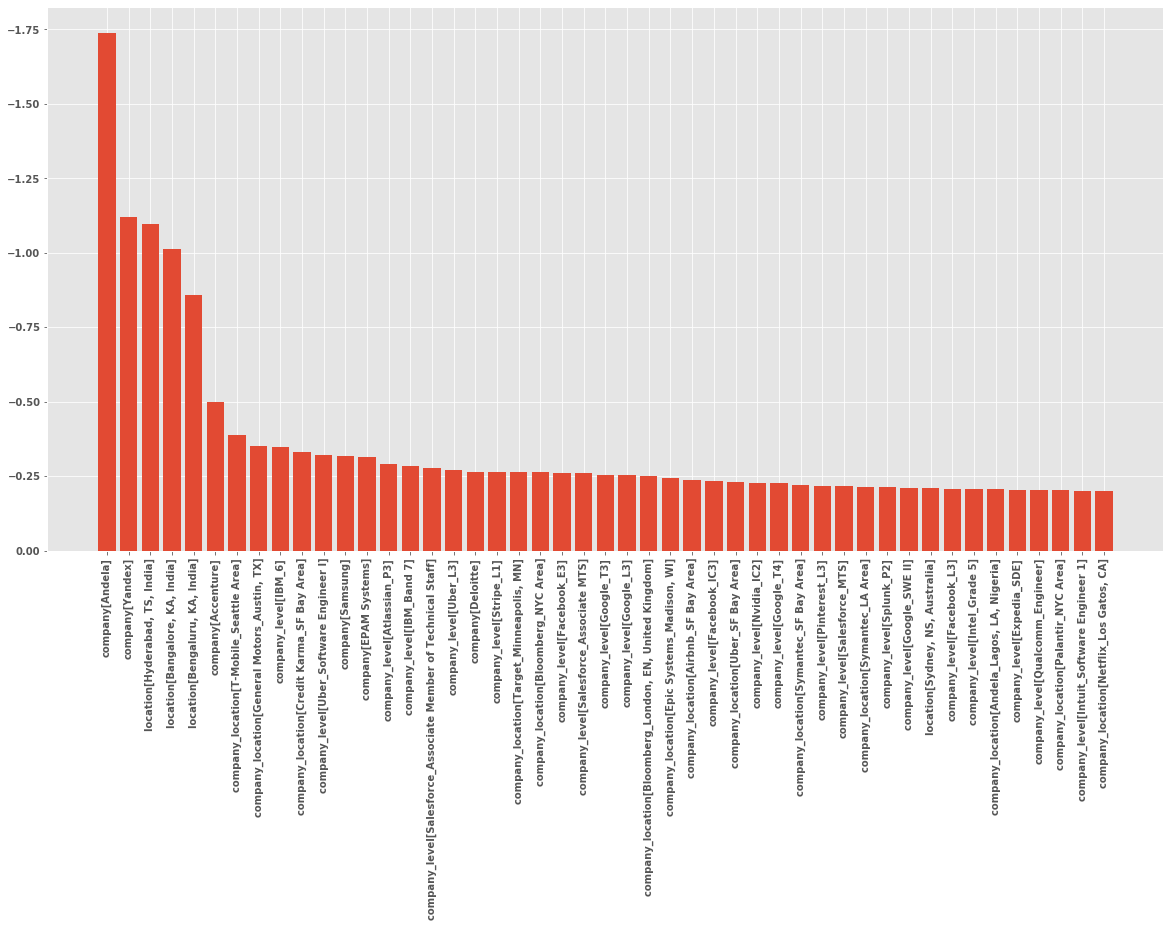

In [15]:
coefs_decrease = best_model_salary['coefs'][best_model_salary['coefs'] < -0.2]
coefs_decrease = coefs_decrease.sort_values()
x = plt.bar(coefs_decrease.index, coefs_decrease)
x = plt.xticks(rotation=90)
x = plt.gca().invert_yaxis()

In [16]:
coefs.filter(like='Google').sort_values().sort_index()
coefs.filter(like='Facebook').sort_values().sort_index()

company[Google]                                        0.313334
company_level[Google_4]                               -0.106068
company_level[Google_5]                               -0.066348
company_level[Google_L3]                              -0.254098
company_level[Google_L4]                              -0.125105
company_level[Google_L5]                              -0.046955
company_level[Google_L6]                               0.063629
company_level[Google_L7]                               0.189275
company_level[Google_SWE II]                          -0.210089
company_level[Google_Senior SWE]                       0.013091
company_level[Google_Staff SWE]                        0.082802
company_level[Google_T3]                              -0.255042
company_level[Google_T4]                              -0.226678
company_level[Google_T5]                              -0.059245
company_location[Google_Austin, TX]                   -0.005587
company_location[Google_Boston Area]    

company[Facebook]                                        0.269749
company_level[Facebook_E3]                              -0.260544
company_level[Facebook_E4]                              -0.028104
company_level[Facebook_E5]                               0.090273
company_level[Facebook_E6]                               0.182179
company_level[Facebook_E7]                               0.251306
company_level[Facebook_IC3]                             -0.234909
company_level[Facebook_IC4]                             -0.031680
company_level[Facebook_IC5]                              0.064046
company_level[Facebook_IC6]                              0.095259
company_level[Facebook_L3]                              -0.208150
company_location[Facebook_Boston Area]                  -0.005953
company_location[Facebook_London, EN, United Kingdom]   -0.082534
company_location[Facebook_NYC Area]                     -0.086037
company_location[Facebook_SF Bay Area]                  -0.164380
company_lo

In [17]:
coefs.filter(like='SF').sort_values()
coefs.filter(like='NY').sort_values()

company_location[Credit Karma_SF Bay Area]         -0.331526
company_location[Airbnb_SF Bay Area]               -0.238438
company_location[Uber_SF Bay Area]                 -0.229799
company_location[Symantec_SF Bay Area]             -0.221632
company_location[Juniper Networks_SF Bay Area]     -0.182435
company_location[Cloudera_SF Bay Area]             -0.178787
company_location[Facebook_SF Bay Area]             -0.164380
company_location[Capital One_SF Bay Area]          -0.163856
company_location[Dropbox_SF Bay Area]              -0.162180
company_location[Coinbase_SF Bay Area]             -0.160241
company_location[Apple_SF Bay Area]                -0.155357
company_location[Yahoo_SF Bay Area]                -0.155132
company_location[Intuit_SF Bay Area]               -0.153515
company_location[Google_SF Bay Area]               -0.150833
company_location[LinkedIn_SF Bay Area]             -0.150280
company_location[NetApp_SF Bay Area]               -0.145919
company_location[Walmart

company_location[Bloomberg_NYC Area]          -0.263423
company_location[Palantir_NYC Area]           -0.202994
company_location[American Express_NYC Area]   -0.164334
company_location[Capital One_NYC Area]        -0.154312
company_location[Uber_NYC Area]               -0.151709
company_location[LinkedIn_NYC Area]           -0.100782
company_location[JPMorgan Chase_NYC Area]     -0.094680
company_location[Google_NYC Area]             -0.088022
company_location[Facebook_NYC Area]           -0.086037
company_location[Two Sigma_NYC Area]          -0.051628
company_location[IBM_NYC Area]                -0.043434
company_location[Goldman Sachs_NYC Area]      -0.021241
company_location[Etsy_NYC Area]                0.018517
company_location[Morgan Stanley_NYC Area]      0.026918
company_location[Amazon_NYC Area]              0.048987
company_location[Adobe_NYC Area]               0.064852
company_location[SquareSpace_NYC Area]         0.065463
company_location[MongoDB_NYC Area]             0